In [167]:
#Install Pandas (For CI Success) - Have to install Locally
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [168]:
#Install Matplotlib (For CI Success) - Have to install Locally
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.1 in c:\users\windows\appdata\local\programs\python\python38-32\lib\site-packages (from matplotlib) (2.8.1)



In [169]:
#importing libraries and creating a data frame of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
#Read Google Play Store CSV
df=pd.read_csv('googleplaystore.csv')

In [171]:
#printing top rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [173]:
#Get Shape of Data Set
print("The Shape of data in (sample, features): ", df.shape)
#Get Data Types of Data Set
print("Data Types: \n", df.dtypes.value_counts())

The Shape of data in (sample, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [174]:
#First Clean Size Column
#Count frequency of each item in the Size Column
df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
780k                     1
176k                     1
874k                     1
676k                     1
688k                     1
Name: Size, Length: 462, dtype: int64

In [175]:
#Removing M's and k's to convert string to numeric values
df.Size = df.Size.str.replace('M','e+6')
df.Size = df.Size.str.replace('k','e+3')
df.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [176]:
#Creating a function to check if every item from Size is convertible to numeric data or not
def is_item_convertible_to_numeric(item):
    try:
        float(item)
        return True
    except ValueError:
        return False

In [177]:
#Create a temp data frame which is a boolean array contains true for all float items
df_temp = df.Size.apply(lambda x: is_item_convertible_to_numeric(x))
df_temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [178]:
df.Size[~df_temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [179]:
#Replacing "Nan" by "Varies with Device"
df.Size = df.Size.replace('Varies with device', np.nan)

In [180]:
#Replacing 1,000+ by 1000 to convert it into numeric
df.Size = df.Size.replace('1,000+', 1000) 

In [181]:
#Now converting the Cleaned Data of Column Size into Numeric by using Pandas
df.Size = pd.to_numeric(df.Size)

Text(0, 0.5, 'Frequency')

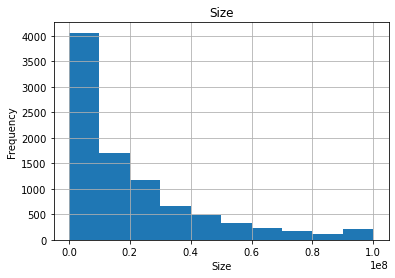

In [182]:
#Plotting histogram for Column Size (Frequency)
df.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [183]:
#Renaming the column name for removing spaces
df.rename(columns={'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver','Android Ver':'Android_Ver'}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [184]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [185]:
df[df.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [186]:
#Finding index of category 1.9 and dropping that row
df.drop(10472,axis=0,inplace=True)
df[df.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [187]:
#Dropping null rating by creating a list of those indices which have null values
drop_nullrating_index=df[df.Rating.isnull()].index
drop_nullrating_index=list(drop_nullrating_index)
df.drop(drop_nullrating_index,inplace=True)
df[df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [188]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [189]:
#Removing character from the values
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace(',','')
df.Installs=df.Installs.astype('int')
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [190]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)